### Wave equation on bounded intervals
Our goal is to compute and visualize solutions of the wave equation $u_{tt}=c^2 u_{xx}$ on the interval $0<x<L$ with initial conditions $u(x,0)=f(x)$ and $u_t(x,0)=g(x)$. Our code will allow us to use the following boundary conditions:
* Dirichlet boundary conditions: $u(0,t)=0$ and $u(L,t)=0$;
* Neumann (or no-flux) boundary conditions: $u_x(0,t)=0$ and $u_x(L,t)=0$;
* Periodic boundary conditions: $u(0,t)=u(L,t)$ and $u_x(0,t)=u_x(L,t)$, which puts the wave equation on a circle of circumference $L$.

First, we load the necessary Python modules.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

Next, we define the following functions:
* `discrete_laplacian` provides a centered finite-difference approximation of the second derivative $u_{xx}$;
* `update_solution` uses the leapfrog method (centered finite-difference approximation of the time derivative $u_{tt}$) to update the solution to the next time step;
* `update_graph` animates the solution;
* `define_initial_condition` uses the given initial conditions to compute the first two solution iterates.

In [2]:
def discrete_laplacian(u, bdy):
    # periodic boundary conditions:
    L = -2*u
    L += np.roll(u, -1)
    L += np.roll(u, +1)
    if bdy == 'Dirichlet':
        L[0]  = -2*u[0]+u[1]
        L[-1] = -2*u[-1]+u[-2]
    elif bdy == 'Neumann':
        L[0]  = 2*(-u[0]+u[1])
        L[-1] = 2*(-u[-1]+u[-2])
    return L

def update_solution(f, g, v, bdy, cfl, dt, Nframes, Nskip):
    n = 0
    u0, um = define_initial_condition(f, g, bdy, dt)
    v[0, :] = u0
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            up = 2*u0 - um + cfl**2*discrete_laplacian(u0, bdy)
            um = u0
            u0 = up
        v[n, :] = u0
        yield u0

def update_graph(u, x, line1):
    line1.set_data(x, u)

def define_initial_condition(f, g, bdy, dt):
    um = f
    u0 = um + 0.5*cfl**2*discrete_laplacian(um, bdy) + dt*g
    return u0, um

In the next cell, we define the speed constant $c>0$, set the initial conditions $u(x,0)=f(x)$ and $u_t(x,0)=g(x)$, and run the animation of the solution. The initial condition used here is a single localized profile. Try the following sequence of simulations:
* Use f and g as defined below.
* Replace g by -g (eg by removing the `#` in front of `g=-g`).
* Replace g by zero (eg by removing the `#` in front of `g=0*g`). 

<IPython.core.display.Javascript object>


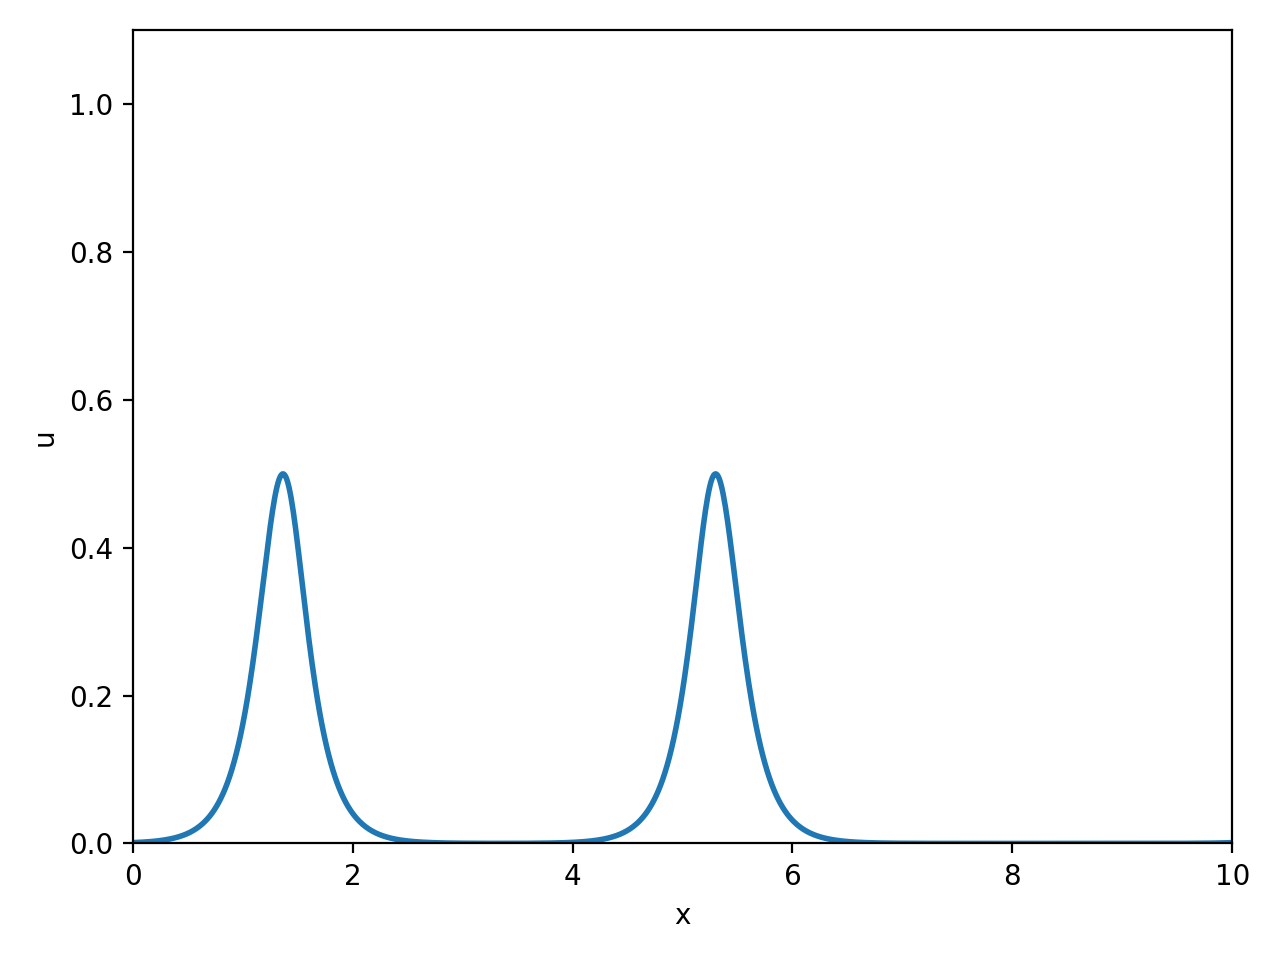

In [4]:
# model parameter
c = 1       # speed constant
L = 10      # domain length

# numerical parameters
N = 1000    # grid size

# set boundary conditions
bdy = 'Periodic'
if bdy=='Periodic':
    x = np.linspace(0, L, N, endpoint=False)
    dx = L/N
else:
    x = np.linspace(0, L, N)
    dx = L/(N-1)

# set initial conditions 
f = 1/np.cosh((x-L/3)*5)
g = 5*c*np.sinh((x-L/3)*5)/np.cosh((x-L/3)*5)**2
# g = -g
# g = 0*g

# animation parameters
Nsteps = 4000
Nskip = 10

# set time step to satisfy leapfrog stability criterion (cfl<1)
cfl = 0.3
dt = cfl * dx / c

# compute and animate solution
Nframes = int(Nsteps/Nskip)
v = np.zeros((Nframes, N))

fig = plt.figure()
ax  = plt.axes(xlim=(0,L), ylim=(np.min(np.min(f)*1.1,0), np.max(np.max(f)*1.1,0)))
line1, = ax.plot([], [], linewidth=2, color="tab:blue")
ax.set_xlabel('x')
ax.set_ylabel('u')
ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(f, g, v, bdy, cfl, dt, Nframes, Nskip),
                              fargs=(x, line1), interval=10, blit=True, repeat=False)
plt.tight_layout()
plt.show()

Finally, we visualize the solution using a space-time contour plot.

<IPython.core.display.Javascript object>


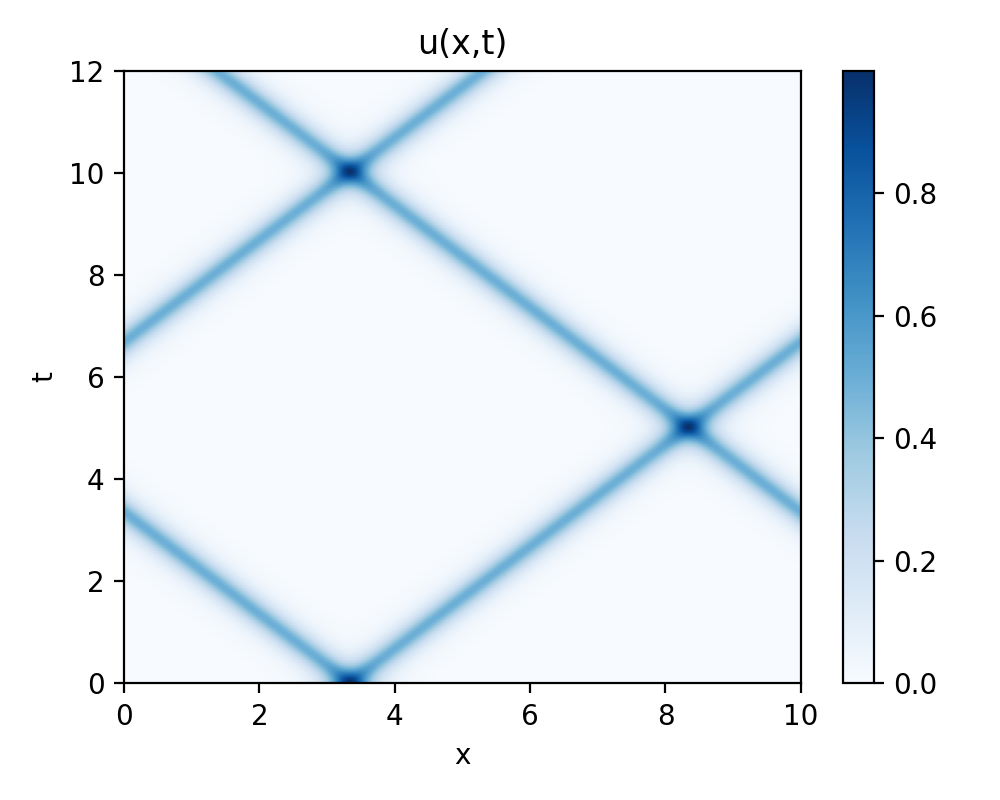

In [5]:
fig = plt.figure(figsize=(5,4))
plt.imshow(v, cmap='Blues', extent = [0, L, 0, Nsteps*dt], aspect='auto', origin='lower')
plt.title('u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.tight_layout()
plt.show()